In [ ]:
# make sure you have all the plots in this file

In [ ]:
# ambr01 violin plot 

True Label 28 - Group Size: 38000 - Predicted Values Range: 18.39816665649414 to 151.71939086914062
True Label 100 - Group Size: 38000 - Predicted Values Range: 22.286834716796875 to 155.50765991210938
True Label 148 - Group Size: 38000 - Predicted Values Range: 24.64922332763672 to 173.28944396972656


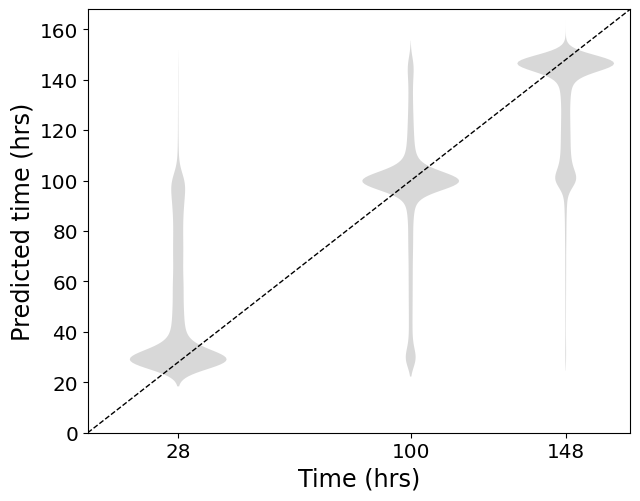

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def plot_true_vs_pred_and_violin(file_path, unique_labels, ax=None, expand_lims=False):
    # Load the npz file
    npz_file = np.load(file_path)
    if ax is None:
        ax = plt.gca()
    
    # Extract necessary data
    true_labels = npz_file['true_labels']
    if 'pred_values' in npz_file:
        pred_values = npz_file['pred_values']
    else:
        pred_values = npz_file['pred_labels']
    
    # Unique true labels (28, 100, 148)
    
    # Group pred_values based on true_labels
    grouped_pred_values = [pred_values[true_labels == label] for label in unique_labels]

    # Check if the grouping is correct and print basic statistics
    for label, group in zip(unique_labels, grouped_pred_values):
        print(f"True Label {label} - Group Size: {len(group)} - Predicted Values Range: {np.min(group)} to {np.max(group)}")
        if len(group) == 0:
            print(f"Warning: No predicted values found for True Label {label}")
    
    # Plot the violins
    violin_parts = ax.violinplot(
        grouped_pred_values, 
        positions=unique_labels,  # Custom x-axis positions
        widths=10 if expand_lims else 30,              # Increased width of violins
        showmeans=False,           # Do not show the mean
        showmedians=False,         # Do not show the median
        showextrema=False,         # Remove the vertical extrema (min/max) lines
        bw_method='silverman',    # Bandwidth method for smoothing
        points=200,               # Number of points for KDE estimation
        side='both'               # Plot both sides of the violin
    )
    
    # Customize the appearance
    ax.set_xticks(unique_labels, [str(_) for _ in unique_labels])  # Label x-axis with unique true labels
    ax.set_xlabel('Time (hrs)', fontsize='xx-large')
    ax.set_ylabel('Predicted time (hrs)', fontsize='xx-large')
    ax.tick_params('both', labelsize='x-large')

    # Customize colors and styles for each component of the violins
    for vp in violin_parts['bodies']:
        vp.set_facecolor('grey')   # Set face color to grey
        vp.set_edgecolor('none')  # Set edge color to none
        vp.set_linewidth(1.5)      # Thicker lines for clarity

    if expand_lims:

        # Get maximum limit for both axes
        x_min = min(unique_labels) - 20
        y_min = min(unique_labels) - 20
        x_max = max(unique_labels) + 20
        y_max = max(unique_labels) + 20
    else:
        
        # Get maximum limit for both axes
        x_min = 0
        y_min = 0
        x_max = max(unique_labels) + 20
        y_max = max(unique_labels) + 20
    
    # Add a grey line for y = x (diagonal line) from origin to the maximum limit
    ax.plot([x_min, x_max], [x_min, y_max], 
             color='k', linestyle='--', linewidth=1, label="y = x")
    # Set the axis limits to include the origin and add some padding
    ax.set_xlim(x_min, x_max)  
    ax.set_ylim(y_min, y_max)  

    
# Create the violin plot without jittering
plt.figure(figsize=(7, 5.5))
# Provide the file path
file_path = "/pscratch/sd/n/niranjan/output/prediction_10_14_01_00.npz"
plot_true_vs_pred_and_violin(file_path, [28, 100, 148])

# Save the figure to a file
plt.savefig("ambr01_violin.png", dpi=100)


True Label 52 - Group Size: 57000 - Predicted Values Range: 45.641658782958984 to 183.84339904785156
True Label 141 - Group Size: 57000 - Predicted Values Range: 46.380672454833984 to 197.47816467285156
True Label 189 - Group Size: 57000 - Predicted Values Range: 55.572669982910156 to 203.16896057128906


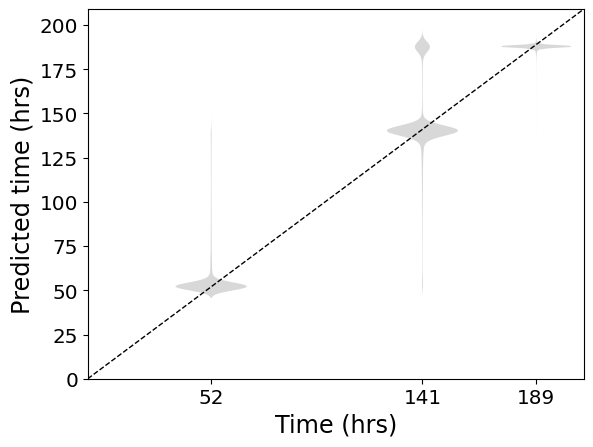

In [37]:
file_path = "/pscratch/sd/n/niranjan/output/ambr03/prediction_10_15_03_00.npz"
plot_true_vs_pred_and_violin(file_path, [52, 141, 189])

True Label 0 - Group Size: 28500 - Predicted Values Range: -15.530405044555664 to 119.3656234741211
True Label 31 - Group Size: 28500 - Predicted Values Range: -2.8419606685638428 to 111.99339294433594
True Label 55 - Group Size: 28500 - Predicted Values Range: -0.4750335216522217 to 110.93650817871094
True Label 79 - Group Size: 28500 - Predicted Values Range: -3.8244898319244385 to 127.59744262695312
True Label 103 - Group Size: 28500 - Predicted Values Range: 6.0853376388549805 to 132.39097595214844
True Label 119 - Group Size: 28100 - Predicted Values Range: -3.0827724933624268 to 132.24143981933594


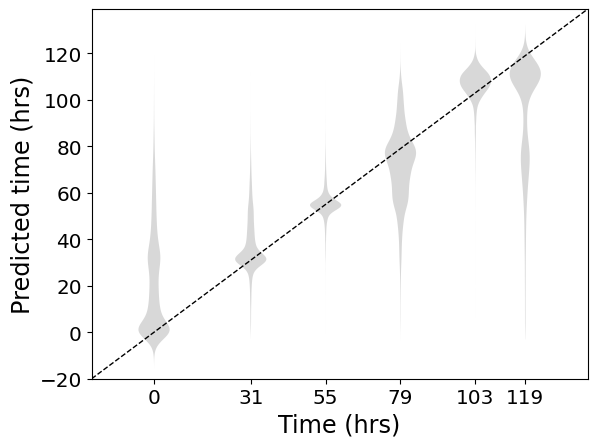

In [38]:
file_path = "/pscratch/sd/n/niranjan/output/prediction_10_15_00_00.npz"
plot_true_vs_pred_and_violin(file_path, [0, 31, 55, 79, 103, 119], expand_lims=True)

True Label 28 - Group Size: 38000 - Predicted Values Range: 18.39816665649414 to 151.71939086914062
True Label 100 - Group Size: 38000 - Predicted Values Range: 22.286834716796875 to 155.50765991210938
True Label 148 - Group Size: 38000 - Predicted Values Range: 24.64922332763672 to 173.28944396972656
True Label 52 - Group Size: 57000 - Predicted Values Range: 45.641658782958984 to 183.84339904785156
True Label 141 - Group Size: 57000 - Predicted Values Range: 46.380672454833984 to 197.47816467285156
True Label 189 - Group Size: 57000 - Predicted Values Range: 55.572669982910156 to 203.16896057128906
True Label 0 - Group Size: 28500 - Predicted Values Range: -15.530405044555664 to 119.3656234741211
True Label 31 - Group Size: 28500 - Predicted Values Range: -2.8419606685638428 to 111.99339294433594
True Label 55 - Group Size: 28500 - Predicted Values Range: -0.4750335216522217 to 110.93650817871094
True Label 79 - Group Size: 28500 - Predicted Values Range: -3.8244898319244385 to 127.5

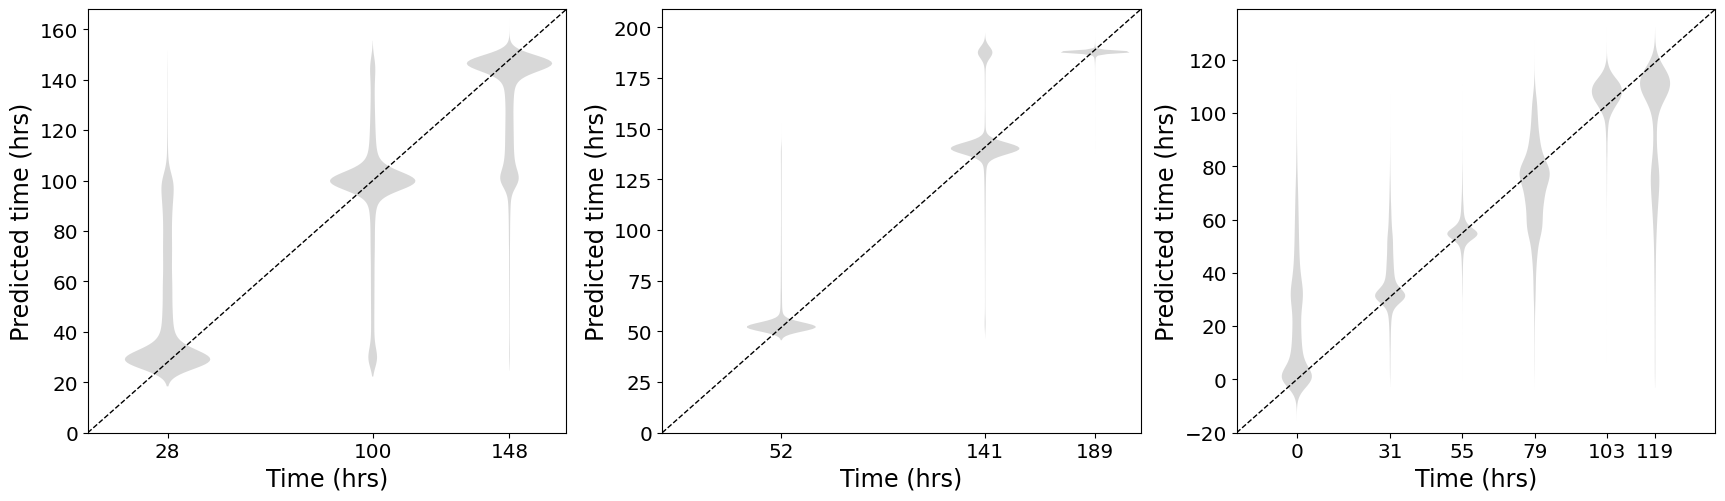

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(21, 5.5))
axes = axes.flatten()

file_path = "/pscratch/sd/n/niranjan/output/prediction_10_14_01_00.npz"
plot_true_vs_pred_and_violin(file_path, [28, 100, 148], ax=axes[0])

file_path = "/pscratch/sd/n/niranjan/output/ambr03/prediction_10_15_03_00.npz"
plot_true_vs_pred_and_violin(file_path, [52, 141, 189], ax=axes[1])

file_path = "/pscratch/sd/n/niranjan/output/prediction_10_15_00_00.npz"
plot_true_vs_pred_and_violin(file_path, [0, 31, 55, 79, 103, 119], expand_lims=True, ax=axes[2])

plt.savefig("violin_plots.png", dpi=100)
# ambr01 condiitoons violin plot

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def plot_true_vs_pred_and_violin(file_path, feed_type):
    # Load the npz file
    npz_file = np.load(file_path)
    
    # Extract necessary data
    true_labels = npz_file['true_labels']
    pred_values = npz_file['pred_values']
    feed = npz_file['feed']  # Extract the feed information
    
    # Filter for the specified feed type
    feed_mask = feed == feed_type
    
    # Apply the filter to true_labels and pred_values
    true_labels_filtered = true_labels[feed_mask]
    pred_values_filtered = pred_values[feed_mask]
    
    # Unique true labels (28, 100, 148)
    unique_labels = [28, 100, 148]
    
    # Group pred_values based on true_labels (filtered for the specified feed)
    grouped_pred_values = [pred_values_filtered[true_labels_filtered == label] for label in unique_labels]

    # Check if the grouping is correct and print basic statistics
    for label, group in zip(unique_labels, grouped_pred_values):
        if len(group) > 0:
            print(f"True Label {label} - Group Size: {len(group)} - Predicted Values Range: {np.min(group)} to {np.max(group)}")
        else:
            print(f"Warning: No predicted values found for True Label {label}")

    # Create the violin plot without jittering
    plt.figure(figsize=(7, 5.5))
    
    # Plot the violins
    violin_parts = plt.violinplot(
        grouped_pred_values, 
        positions=unique_labels,  # Custom x-axis positions
        widths=30,               # Increased width of violins
        showmeans=False,           # Do not show the mean
        showmedians=False,         # Do not show the median
        showextrema=False,         # Remove the vertical extrema (min/max) lines
        bw_method='silverman',    # Bandwidth method for smoothing
        points=200,               # Number of points for KDE estimation
        side='both'               # Plot both sides of the violin
    )
    
    # Customize the appearance
    plt.xticks(unique_labels, ['28', '100', '148'])  # Label x-axis with unique true labels
    plt.xlabel('Time (hrs)', fontsize='xx-large')
    plt.ylabel('Predicted time (hrs)', fontsize='xx-large')
    ax = plt.gca()
    ax.tick_params('both', labelsize='x-large')

    # Customize colors and styles for each component of the violins
    for vp in violin_parts['bodies']:
        vp.set_facecolor('grey')   # Set face color to grey
        vp.set_edgecolor('none')  # Set edge color to none
        vp.set_linewidth(1.5)      # Thicker lines for clarity

    # Add a grey line for y = x (diagonal line)
    plt.plot([0, max(unique_labels)], [0, max(unique_labels)], 
             color='k', linestyle='--', linewidth=1, label="y = x")

    # Set the axis limits to include the origin
    plt.xlim(0, max(unique_labels) + 20)  # Add some padding
    plt.ylim(0, max(unique_labels) + 20)  # Add some padding
    
    # Save the figure to a file
    plt.title(f'Violin Plot for Feed: {feed_type}')
    plt.savefig(f"ambr01_violin_{feed_type}.png", dpi=100)
    plt.close()  # Close the figure to prevent overlap

# Provide the file path
file_path = "/pscratch/sd/n/niranjan/output/prediction_by_feed_10_14_01_00.npz"

# List of feeds to plot
feeds_to_plot = ['Glucose Only', 'C:N 6', 'C:N 15', 'C:N 30']

# Loop over each feed type and generate the plots
for feed in feeds_to_plot:
    plot_true_vs_pred_and_violin(file_path, feed)

print("Plots for specified feeds have been created.")


True Label 28 - Group Size: 9500 - Predicted Values Range: 19.942102432250977 to 145.44961547851562
True Label 100 - Group Size: 9500 - Predicted Values Range: 25.847003936767578 to 155.50765991210938
True Label 148 - Group Size: 9500 - Predicted Values Range: 24.697528839111328 to 156.6941375732422
True Label 28 - Group Size: 9500 - Predicted Values Range: 19.147493362426758 to 145.0062713623047
True Label 100 - Group Size: 9500 - Predicted Values Range: 28.368982315063477 to 155.11312866210938
True Label 148 - Group Size: 9500 - Predicted Values Range: 28.25550651550293 to 158.41465759277344
True Label 28 - Group Size: 9500 - Predicted Values Range: 21.748714447021484 to 146.39442443847656
True Label 100 - Group Size: 9500 - Predicted Values Range: 27.21352767944336 to 151.9990692138672
True Label 148 - Group Size: 9500 - Predicted Values Range: 24.64922332763672 to 160.7702178955078
True Label 28 - Group Size: 9500 - Predicted Values Range: 18.39816665649414 to 151.71939086914062
Tr

In [25]:
# ambr03 violin plot

True Label 52 - Group Size: 57000 - Predicted Values Range: 45.641658782958984 to 183.84339904785156
True Label 141 - Group Size: 57000 - Predicted Values Range: 46.380672454833984 to 197.47816467285156
True Label 189 - Group Size: 57000 - Predicted Values Range: 55.572669982910156 to 203.16896057128906


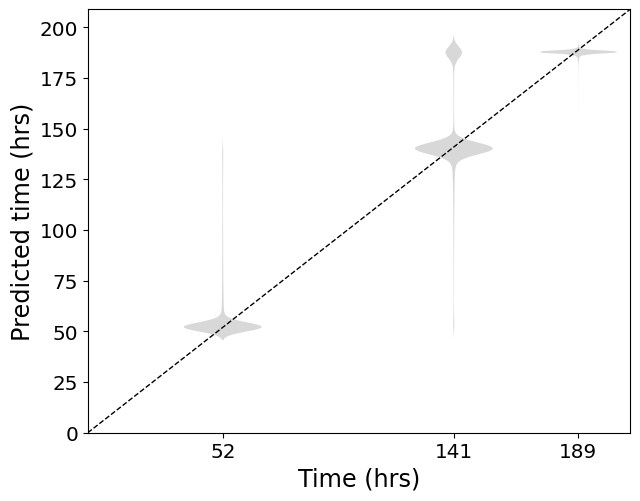

In [138]:
import numpy as np
import matplotlib.pyplot as plt

def plot_true_vs_pred_and_violin(file_path):
    # Load the npz file
    npz_file = np.load(file_path)
    
    # Extract necessary data
    true_labels = npz_file['true_labels']
    pred_values = npz_file['pred_labels']
    
    # Unique true labels (28, 100, 148)
    unique_labels = [52, 141, 189]
    
    # Group pred_values based on true_labels
    grouped_pred_values = [pred_values[true_labels == label] for label in unique_labels]

    # Check if the grouping is correct and print basic statistics
    for label, group in zip(unique_labels, grouped_pred_values):
        print(f"True Label {label} - Group Size: {len(group)} - Predicted Values Range: {np.min(group)} to {np.max(group)}")
        if len(group) == 0:
            print(f"Warning: No predicted values found for True Label {label}")

    # Create the violin plot without jittering
    plt.figure(figsize=(7, 5.5))
    
    # Plot the violins
    violin_parts = plt.violinplot(
        grouped_pred_values, 
        positions=unique_labels,  # Custom x-axis positions
        widths=30,               # Increased width of violins
        showmeans=False,           # Do not show the mean
        showmedians=False,         # Do not show the median
        showextrema=False,         # Remove the vertical extrema (min/max) lines
        bw_method='silverman',    # Bandwidth method for smoothing
        points=200,               # Number of points for KDE estimation
        side='both'               # Plot both sides of the violin
    )
    
    # Customize the appearance
    plt.xticks(unique_labels, ['52', '141', '189'])  # Label x-axis with unique true labels
    plt.xlabel('Time (hrs)', fontsize='xx-large')
    plt.ylabel('Predicted time (hrs)', fontsize='xx-large')
    ax = plt.gca()
    ax.tick_params('both', labelsize='x-large')

    # Customize colors and styles for each component of the violins
    for vp in violin_parts['bodies']:
        vp.set_facecolor('grey')   # Set face color to grey
        vp.set_edgecolor('none')  # Set edge color to none
        vp.set_linewidth(1.5)      # Thicker lines for clarity

    # Get maximum limit for both axes
    x_max = max(unique_labels) + 20
    y_max = max(unique_labels) + 20

    # Add a grey line for y = x (diagonal line) from origin to the maximum limit
    plt.plot([0, x_max], [0, y_max], 
             color='k', linestyle='--', linewidth=1, label="y = x")

    # Set the axis limits to include the origin and add some padding
    plt.xlim(0, x_max)  
    plt.ylim(0, y_max)  

# Provide the file path
file_path = "/pscratch/sd/n/niranjan/output/ambr03/prediction_10_15_03_00.npz"
plot_true_vs_pred_and_violin(file_path)

# Save the figure to a file
plt.savefig("ambr03_violin.png", dpi=100)


In [ ]:
# ambr03 condition violin plot 

In [139]:
import numpy as np
import matplotlib.pyplot as plt

def plot_true_vs_pred_and_violin(file_path, feed_type):
    # Load the npz file
    npz_file = np.load(file_path)
    
    # Extract necessary data
    true_labels = npz_file['true_labels']
    pred_values = npz_file['pred_labels']
    feed = npz_file['feed']  # Extract the feed information
    
    # Filter for the specified feed type
    feed_mask = feed == feed_type
    
    # Apply the filter to true_labels and pred_values
    true_labels_filtered = true_labels[feed_mask]
    pred_values_filtered = pred_values[feed_mask]
    
    # Unique true labels (28, 100, 148)
    unique_labels = [52, 141, 189]
    
    # Group pred_values based on true_labels (filtered for the specified feed)
    grouped_pred_values = [pred_values_filtered[true_labels_filtered == label] for label in unique_labels]

    # Check if the grouping is correct and print basic statistics
    for label, group in zip(unique_labels, grouped_pred_values):
        if len(group) > 0:
            print(f"True Label {label} - Group Size: {len(group)} - Predicted Values Range: {np.min(group)} to {np.max(group)}")
        else:
            print(f"Warning: No predicted values found for True Label {label}")

    # Create the violin plot without jittering
    plt.figure(figsize=(7, 5.5))
    
    # Plot the violins
    violin_parts = plt.violinplot(
        grouped_pred_values, 
        positions=unique_labels,  # Custom x-axis positions
        widths=30,               # Increased width of violins
        showmeans=False,           # Do not show the mean
        showmedians=False,         # Do not show the median
        showextrema=False,         # Remove the vertical extrema (min/max) lines
        bw_method='silverman',    # Bandwidth method for smoothing
        points=200,               # Number of points for KDE estimation
        side='both'               # Plot both sides of the violin
    )
    
    # Customize the appearance
    plt.xticks(unique_labels, ['52', '141', '189'])  # Label x-axis with unique true labels
    plt.xlabel('Time (hrs)', fontsize='xx-large')
    plt.ylabel('Predicted time (hrs)', fontsize='xx-large')
    ax = plt.gca()
    ax.tick_params('both', labelsize='x-large')

    # Customize colors and styles for each component of the violins
    for vp in violin_parts['bodies']:
        vp.set_facecolor('grey')   # Set face color to grey
        vp.set_edgecolor('none')  # Set edge color to none
        vp.set_linewidth(1.5)      # Thicker lines for clarity

    # Get maximum limit for both axes
    x_max = max(unique_labels) + 20
    y_max = max(unique_labels) + 20

    # Add a grey line for y = x (diagonal line) from origin to the maximum limit
    plt.plot([0, x_max], [0, y_max], 
             color='k', linestyle='--', linewidth=1, label="y = x")

    # Set the axis limits to include the origin and add some padding
    plt.xlim(0, x_max)  
    plt.ylim(0, y_max)  
    
    # Save the figure to a file
    plt.title(f'Feed: {feed_type}')
    plt.savefig(f"ambr03_violin_{feed_type}.png", dpi=100)
    plt.close()  # Close the figure to prevent overlap

# Provide the file path
file_path = "/pscratch/sd/n/niranjan/output/ambr03/prediction_by_feed_10_15_03_00.npz"

# List of feeds to plot
feeds_to_plot = ['C:N 6', 'C:N 15', 'C:N 30']

# Loop over each feed type and generate the plots
for feed in feeds_to_plot:
    plot_true_vs_pred_and_violin(file_path, feed)

print("Plots for specified feeds have been created.")


True Label 52 - Group Size: 19000 - Predicted Values Range: 46.7477912902832 to 159.63954162597656
True Label 141 - Group Size: 19000 - Predicted Values Range: 46.380672454833984 to 190.902587890625
True Label 189 - Group Size: 19000 - Predicted Values Range: 55.572669982910156 to 198.2232208251953
True Label 52 - Group Size: 19000 - Predicted Values Range: 45.641658782958984 to 183.84339904785156
True Label 141 - Group Size: 19000 - Predicted Values Range: 47.69813919067383 to 187.51881408691406
True Label 189 - Group Size: 19000 - Predicted Values Range: 97.67459869384766 to 197.47679138183594
True Label 52 - Group Size: 19000 - Predicted Values Range: 46.51810073852539 to 172.9223175048828
True Label 141 - Group Size: 19000 - Predicted Values Range: 61.507816314697266 to 197.47816467285156
True Label 189 - Group Size: 19000 - Predicted Values Range: 106.93826293945312 to 203.16896057128906
Plots for specified feeds have been created.


In [ ]:
# ambr01_NSR violin plot

True Label 0 - Group Size: 28500 - Predicted Values Range: -15.530405044555664 to 119.3656234741211
True Label 31 - Group Size: 28500 - Predicted Values Range: -2.8419606685638428 to 111.99339294433594
True Label 55 - Group Size: 28500 - Predicted Values Range: -0.4750335216522217 to 110.93650817871094
True Label 79 - Group Size: 28500 - Predicted Values Range: -3.8244898319244385 to 127.59744262695312
True Label 103 - Group Size: 28500 - Predicted Values Range: 6.0853376388549805 to 132.39097595214844
True Label 119 - Group Size: 28100 - Predicted Values Range: -3.0827724933624268 to 132.24143981933594


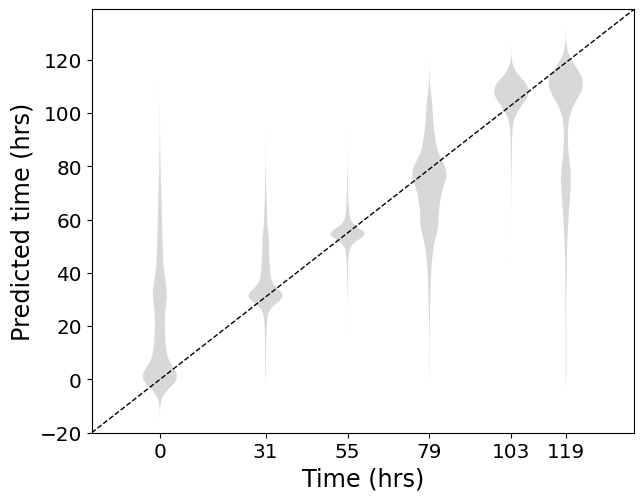

In [140]:
import numpy as np
import matplotlib.pyplot as plt

def plot_true_vs_pred_and_violin(file_path):
    # Load the npz file
    npz_file = np.load(file_path)
    
    # Extract necessary data
    true_labels = npz_file['true_labels']
    pred_values = npz_file['pred_values']
    
    # Unique true labels (28, 100, 148)
    unique_labels = [0, 31, 55, 79, 103, 119]
    
    # Group pred_values based on true_labels
    grouped_pred_values = [pred_values[true_labels == label] for label in unique_labels]

    # Check if the grouping is correct and print basic statistics
    for label, group in zip(unique_labels, grouped_pred_values):
        print(f"True Label {label} - Group Size: {len(group)} - Predicted Values Range: {np.min(group)} to {np.max(group)}")
        if len(group) == 0:
            print(f"Warning: No predicted values found for True Label {label}")

    # Create the violin plot without jittering
    plt.figure(figsize=(7, 5.5))
    
    # Plot the violins
    violin_parts = plt.violinplot(
        grouped_pred_values, 
        positions=unique_labels,  # Custom x-axis positions
        widths=10,               # Increased width of violins
        showmeans=False,           # Do not show the mean
        showmedians=False,         # Do not show the median
        showextrema=False,         # Remove the vertical extrema (min/max) lines
        bw_method='silverman',    # Bandwidth method for smoothing
        points=200,               # Number of points for KDE estimation
        side='both'               # Plot both sides of the violin
    )
    
    # Customize the appearance
    plt.xticks(unique_labels, ['0', '31', '55', '79', '103', '119'])  # Label x-axis with unique true labels
    plt.xlabel('Time (hrs)', fontsize='xx-large')
    plt.ylabel('Predicted time (hrs)', fontsize='xx-large')
    ax = plt.gca()
    ax.tick_params('both', labelsize='x-large')

    # Customize colors and styles for each component of the violins
    for vp in violin_parts['bodies']:
        vp.set_facecolor('grey')   # Set face color to grey
        vp.set_edgecolor('none')  # Set edge color to none
        vp.set_linewidth(1.5)      # Thicker lines for clarity

    # Get maximum limit for both axes
    x_min = min(unique_labels) - 20
    y_min = min(unique_labels) - 20
    x_max = max(unique_labels) + 20
    y_max = max(unique_labels) + 20

    # Add a grey line for y = x (diagonal line) from origin to the maximum limit
    plt.plot([x_min, x_max], [y_min, y_max], 
             color='k', linestyle='--', linewidth=1, label="y = x")

    # Set the axis limits to include the origin and add some padding
    plt.xlim(x_min, x_max)  
    plt.ylim(y_min, y_max)  

# Provide the file path
file_path = "/pscratch/sd/n/niranjan/output/prediction_10_15_00_00.npz"
plot_true_vs_pred_and_violin(file_path)

# Save the figure to a file
plt.savefig("ABF_FA_violin.png", dpi=100)


In [ ]:
# ambr01_NSR condition violin plot

In [141]:
import numpy as np
import matplotlib.pyplot as plt

def plot_true_vs_pred_and_violin(file_path, feed_type):
    # Load the npz file
    npz_file = np.load(file_path)
    
    # Extract necessary data
    true_labels = npz_file['true_labels']
    pred_values = npz_file['pred_values']
    feed = npz_file['feed']  # Extract the feed information
    
    # Filter for the specified feed type
    feed_mask = feed == feed_type
    
    # Apply the filter to true_labels and pred_values
    true_labels_filtered = true_labels[feed_mask]
    pred_values_filtered = pred_values[feed_mask]
    
    # Unique true labels (28, 100, 148)
    unique_labels = [0, 31, 55, 79, 103, 119]
    
    # Group pred_values based on true_labels (filtered for the specified feed)
    grouped_pred_values = [pred_values_filtered[true_labels_filtered == label] for label in unique_labels]

    # Check if the grouping is correct and print basic statistics
    for label, group in zip(unique_labels, grouped_pred_values):
        if len(group) > 0:
            print(f"True Label {label} - Group Size: {len(group)} - Predicted Values Range: {np.min(group)} to {np.max(group)}")
        else:
            print(f"Warning: No predicted values found for True Label {label}")

    # Create the violin plot without jittering
    plt.figure(figsize=(7, 5.5))
    
    # Plot the violins
    violin_parts = plt.violinplot(
        grouped_pred_values, 
        positions=unique_labels,  # Custom x-axis positions
        widths=10,               # Increased width of violins
        showmeans=False,           # Do not show the mean
        showmedians=False,         # Do not show the median
        showextrema=False,         # Remove the vertical extrema (min/max) lines
        bw_method='silverman',    # Bandwidth method for smoothing
        points=200,               # Number of points for KDE estimation
        side='both'               # Plot both sides of the violin
    )
    
    # Customize the appearance
    plt.xticks(unique_labels, ['0', '31', '55', '79', '103', '119'])  # Label x-axis with unique true labels
    plt.xlabel('Time (hrs)', fontsize='xx-large')
    plt.ylabel('Predicted time (hrs)', fontsize='xx-large')
    ax = plt.gca()
    ax.tick_params('both', labelsize='x-large')

    # Customize colors and styles for each component of the violins
    for vp in violin_parts['bodies']:
        vp.set_facecolor('grey')   # Set face color to grey
        vp.set_edgecolor('none')  # Set edge color to none
        vp.set_linewidth(1.5)      # Thicker lines for clarity

    # Get maximum limit for both axes
    x_min = min(unique_labels) - 20
    y_min = min(unique_labels) - 20
    x_max = max(unique_labels) + 20
    y_max = max(unique_labels) + 20

    # Add a grey line for y = x (diagonal line) from origin to the maximum limit
    plt.plot([x_min, x_max], [y_min, y_max], 
             color='k', linestyle='--', linewidth=1, label="y = x")

    # Set the axis limits to include the origin and add some padding
    plt.xlim(x_min, x_max)  
    plt.ylim(y_min, y_max)  
    
    # Save the figure to a file
    plt.title(f'Feed: {feed_type}')
    plt.savefig(f"ABF_FA_ambr01_violin_{feed_type}.png", dpi=100)
    plt.close()  # Close the figure to prevent overlap

# Provide the file path
file_path = "/pscratch/sd/n/niranjan/output/prediction_by_feed_10_15_00_00.npz"

# List of feeds to plot
feeds_to_plot = ['Control', 'Temperature Shift (33°C) after 48h', 'DO saturation (15%)']

# Loop over each feed type and generate the plots
for feed in feeds_to_plot:
    plot_true_vs_pred_and_violin(file_path, feed)

print("Plots for specified feeds have been created.")


True Label 0 - Group Size: 9500 - Predicted Values Range: -15.530405044555664 to 105.77171325683594
True Label 31 - Group Size: 9500 - Predicted Values Range: -2.7018535137176514 to 111.99339294433594
True Label 55 - Group Size: 9500 - Predicted Values Range: 2.0875844955444336 to 107.1982650756836
True Label 79 - Group Size: 9500 - Predicted Values Range: -3.563135862350464 to 127.59744262695312
True Label 103 - Group Size: 9500 - Predicted Values Range: 7.55413293838501 to 127.14002990722656
True Label 119 - Group Size: 9500 - Predicted Values Range: 8.195063591003418 to 132.24143981933594
True Label 0 - Group Size: 9500 - Predicted Values Range: -5.7321062088012695 to 110.38571166992188
True Label 31 - Group Size: 9500 - Predicted Values Range: -2.8419606685638428 to 110.867919921875
True Label 55 - Group Size: 9500 - Predicted Values Range: 0.9243416786193848 to 110.93650817871094
True Label 79 - Group Size: 9500 - Predicted Values Range: 1.6017496585845947 to 119.40798950195312
Tr

In [ ]:
Feed confusion matrices here:
    
prediction_10_18_00_00.npz           
prediction_10_18_01_00.npz 
prediction_10_18_03_00.npz

Confusion matrix saved to: /pscratch/sd/n/niranjan/visualisation/conf_time_ABF_FA_ambr01.png


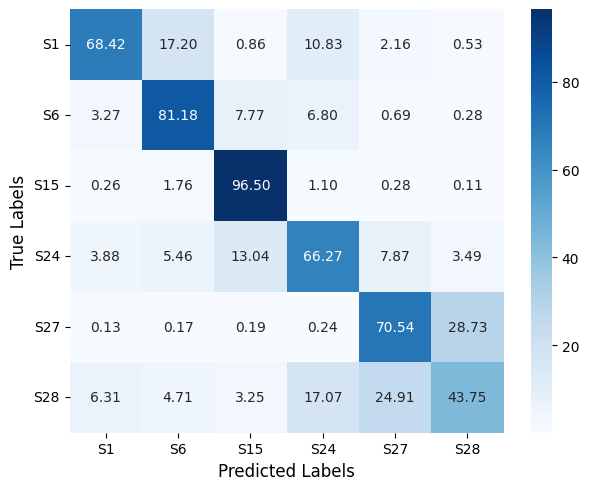

Overall Accuracy: 0.7117
Overall Precision: 0.7072
Overall Recall: 0.7117


In [156]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import os

def plot_confusion_matrix(npz_file_path, custom_labels, save_name=None):
    # Load the NPZ file
    data = np.load(npz_file_path, allow_pickle=True)

    # Extract true labels and predicted labels
    true_labels = data['true_labels']  # Adjust the key as necessary
    pred_labels = data['pred_labels']   # Adjust the key as necessary

    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)
    
    # Define the desired label order: ['S4', 'S10', 'S14'] (mapped from your original labels)
    new_order = [0, 5, 1, 2, 3, 4]  # This matches S4 -> 2, S10 -> 0, S14 -> 1 in your original labeling
    cm = cm[new_order, :]  # Reorder rows (true labels)
    cm = cm[:, new_order]  # Reorder columns (predicted labels)

    # Normalize the confusion matrix to percentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Plot confusion matrix using seaborn heatmap with a blue color map
    plt.figure(figsize=(7, 5.5))
    sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", 
                xticklabels=custom_labels, yticklabels=custom_labels)

    # Add labels and title
    plt.ylabel('True Labels', fontsize=12)
    plt.xlabel('Predicted Labels', fontsize=12)
    
    # Adjust label rotations: Predicted (x-axis) horizontal, True (y-axis) vertical
    plt.xticks(rotation=0)  # Keep the predicted labels horizontal
    plt.yticks(rotation=0)  # Keep the true labels vertical

    # Save the plot to file in the current working directory if save_name is provided
    if save_name:
        save_path = os.path.join(os.getcwd(), save_name)
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Confusion matrix saved to: {save_path}")


    # Calculate overall metrics
    accuracy = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels, average='weighted')
    recall = recall_score(true_labels, pred_labels, average='weighted')

    # Display overall metrics
    print(f'Overall Accuracy: {accuracy:.4f}')
    print(f'Overall Precision: {precision:.4f}')
    print(f'Overall Recall: {recall:.4f}')

# Path to the NPZ file
npz_file_path = "/pscratch/sd/n/niranjan/output/prediction_10_14_00_00.npz"

# Custom labels in desired display order
custom_labels = ['S1', 'S6', 'S15', 'S24', 'S27', 'S28']

# Custom name for the saved confusion matrix image
save_name = "conf_time_ABF_FA_ambr01.png"

# Call the function to plot the confusion matrix, save it, and calculate overall metrics
plot_confusion_matrix(npz_file_path, custom_labels, save_name)


Confusion matrix saved to: /pscratch/sd/n/niranjan/lmcontrol/notebooks/conf_ABF_FA_ambr01.png


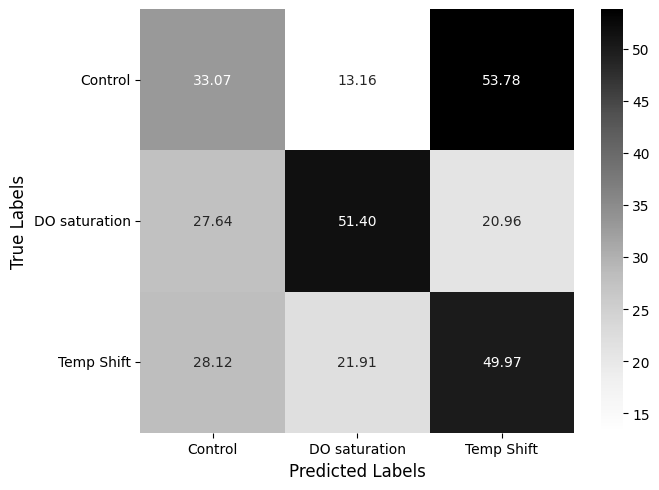

Overall Accuracy: 0.4480
Overall Precision: 0.4554
Overall Recall: 0.4480


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import os

def plot_confusion_matrix(npz_file_path, custom_labels, save_name=None):
    # Load the NPZ file
    data = np.load(npz_file_path, allow_pickle=True)

    # Extract true labels and predicted labels
    true_labels = data['true_labels']  # Adjust the key as necessary
    pred_labels = data['pred_labels']   # Adjust the key as necessary

    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)

    # Normalize the confusion matrix to percentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Plot confusion matrix using seaborn heatmap with a greyscale color map
    plt.figure(figsize=(7, 5.5))
    sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Greys", 
                xticklabels=custom_labels, yticklabels=custom_labels)

    # Add labels and title
    plt.ylabel('True Labels', fontsize=12)
    plt.xlabel('Predicted Labels', fontsize=12)
    
    # Adjust label rotations: Predicted (x-axis) horizontal, True (y-axis) vertical
    plt.xticks(rotation=0)  # Keep the predicted labels horizontal
    plt.yticks(rotation=0)  # Keep the true labels vertical

    # Save the plot to file in the current working directory if save_name is provided
    if save_name:
        save_path = os.path.join(os.getcwd(), save_name)
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Confusion matrix saved to: {save_path}")

    # Show the plot
    plt.show()

    # Calculate overall metrics
    accuracy = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels, average='weighted')
    recall = recall_score(true_labels, pred_labels, average='weighted')

    # Display overall metrics
    print(f'Overall Accuracy: {accuracy:.4f}')
    print(f'Overall Precision: {precision:.4f}')
    print(f'Overall Recall: {recall:.4f}')

# Path to the NPZ file
npz_file_path = "/pscratch/sd/n/niranjan/output/prediction_10_18_00_00.npz"

# Custom labels to replace 0, 1, 2, etc.
custom_labels = ['Control',  'DO saturation', 'Temp Shift']  # Replace with your actual labels

# Custom name for the saved confusion matrix image
save_name = "conf_ABF_FA_ambr01.png"

# Call the function to plot the confusion matrix, save it, and calculate overall metrics
plot_confusion_matrix(npz_file_path, custom_labels, save_name)


Confusion matrix saved to: /pscratch/sd/n/niranjan/visualisation/conf_time_ambr03.png


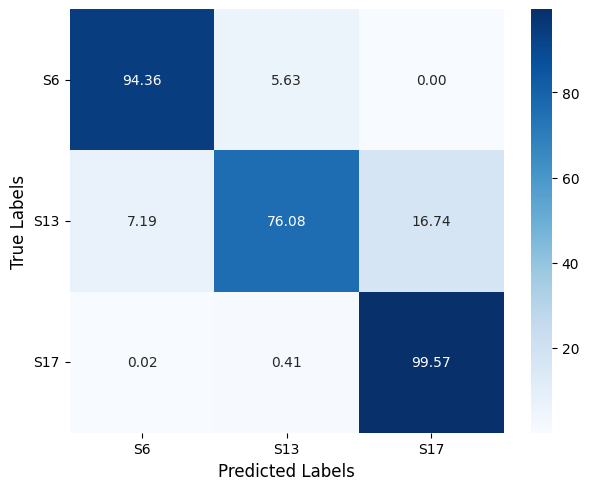

Overall Accuracy: 0.9000
Overall Precision: 0.9039
Overall Recall: 0.9000


In [161]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import os

def plot_confusion_matrix(npz_file_path, custom_labels, save_name=None):
    # Load the NPZ file
    data = np.load(npz_file_path, allow_pickle=True)

    # Extract true labels and predicted labels
    true_labels = data['true_labels']  # Adjust the key as necessary
    pred_labels = data['pred_labels']   # Adjust the key as necessary

    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)
    
    # Define the desired label order: ['S4', 'S10', 'S14'] (mapped from your original labels)
    new_order = [2, 0, 1]  # This matches S4 -> 2, S10 -> 0, S14 -> 1 in your original labeling
    cm = cm[new_order, :]  # Reorder rows (true labels)
    cm = cm[:, new_order]  # Reorder columns (predicted labels)

    # Normalize the confusion matrix to percentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Plot confusion matrix using seaborn heatmap with a blue color map
    plt.figure(figsize=(7, 5.5))
    sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", 
                xticklabels=custom_labels, yticklabels=custom_labels)

    # Add labels and title
    plt.ylabel('True Labels', fontsize=12)
    plt.xlabel('Predicted Labels', fontsize=12)
    
    # Adjust label rotations: Predicted (x-axis) horizontal, True (y-axis) vertical
    plt.xticks(rotation=0)  # Keep the predicted labels horizontal
    plt.yticks(rotation=0)  # Keep the true labels vertical

    # Save the plot to file in the current working directory if save_name is provided
    if save_name:
        save_path = os.path.join(os.getcwd(), save_name)
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Confusion matrix saved to: {save_path}")

    # Show the plot
    plt.show()

    # Calculate overall metrics
    accuracy = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels, average='weighted')
    recall = recall_score(true_labels, pred_labels, average='weighted')

    # Display overall metrics
    print(f'Overall Accuracy: {accuracy:.4f}')
    print(f'Overall Precision: {precision:.4f}')
    print(f'Overall Recall: {recall:.4f}')

# Path to the NPZ file
npz_file_path = "/pscratch/sd/n/niranjan/output/ambr03/prediction_classifier_10_03_03.npz"

# Custom labels in desired display order
custom_labels = ['S6', 'S13', 'S17']

# Custom name for the saved confusion matrix image
save_name = "conf_time_ambr03.png"

# Call the function to plot the confusion matrix, save it, and calculate overall metrics
plot_confusion_matrix(npz_file_path, custom_labels, save_name)


Confusion matrix saved to: /pscratch/sd/n/niranjan/lmcontrol/notebooks/conf_ambr03.png


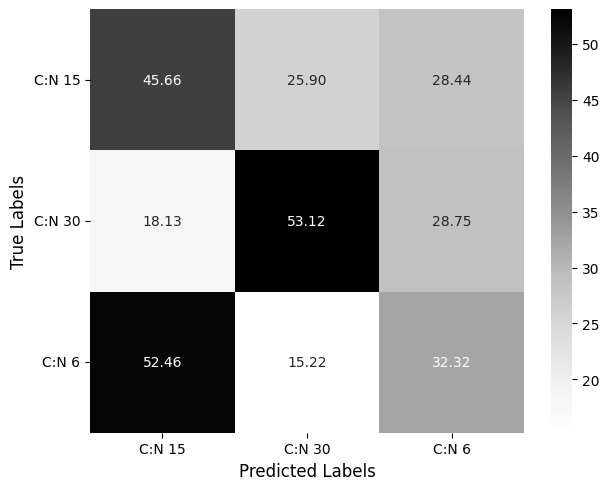

Overall Accuracy: 0.4370
Overall Precision: 0.4392
Overall Recall: 0.4370


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import os

def plot_confusion_matrix(npz_file_path, custom_labels, save_name=None):
    # Load the NPZ file
    data = np.load(npz_file_path, allow_pickle=True)

    # Extract true labels and predicted labels
    true_labels = data['true_labels']  # Adjust the key as necessary
    pred_labels = data['pred_labels']   # Adjust the key as necessary

    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)

    # Normalize the confusion matrix to percentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Plot confusion matrix using seaborn heatmap with a greyscale color map
    plt.figure(figsize=(7, 5.5))
    sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Greys", 
                xticklabels=custom_labels, yticklabels=custom_labels)

    # Add labels and title
    plt.ylabel('True Labels', fontsize=12)
    plt.xlabel('Predicted Labels', fontsize=12)
    
    # Adjust label rotations: Predicted (x-axis) horizontal, True (y-axis) vertical
    plt.xticks(rotation=0)  # Keep the predicted labels horizontal
    plt.yticks(rotation=0)  # Keep the true labels vertical

    # Save the plot to file in the current working directory if save_name is provided
    if save_name:
        save_path = os.path.join(os.getcwd(), save_name)
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Confusion matrix saved to: {save_path}")

    # Show the plot
    plt.show()

    # Calculate overall metrics
    accuracy = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels, average='weighted')
    recall = recall_score(true_labels, pred_labels, average='weighted')

    # Display overall metrics
    print(f'Overall Accuracy: {accuracy:.4f}')
    print(f'Overall Precision: {precision:.4f}')
    print(f'Overall Recall: {recall:.4f}')

# Path to the NPZ file
npz_file_path = "/pscratch/sd/n/niranjan/output/ambr03/prediction_10_18_03_00.npz"

# Custom labels to replace 0, 1, 2, etc.
custom_labels = ['C:N 15', 'C:N 30', 'C:N 6']  # Replace with your actual labels

# Custom name for the saved confusion matrix image
save_name = "conf_ambr03.png"

# Call the function to plot the confusion matrix, save it, and calculate overall metrics
plot_confusion_matrix(npz_file_path, custom_labels, save_name)


Confusion matrix saved to: /pscratch/sd/n/niranjan/visualisation/conf_time_ambr01_blue.png


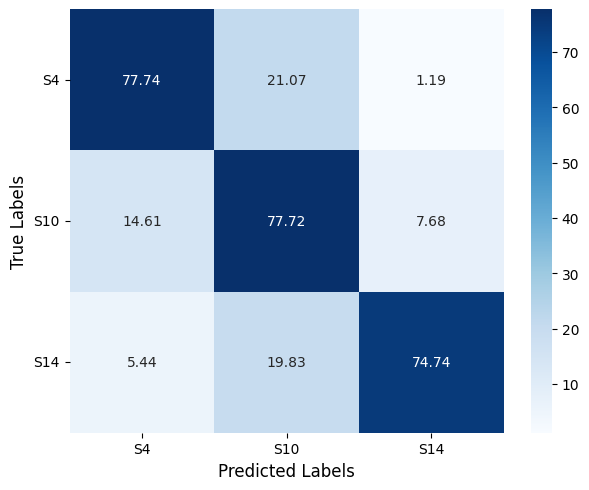

Overall Accuracy: 0.7673
Overall Precision: 0.7814
Overall Recall: 0.7673


In [150]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import os

def plot_confusion_matrix(npz_file_path, custom_labels, save_name=None):
    # Load the NPZ file
    data = np.load(npz_file_path, allow_pickle=True)

    # Extract true labels and predicted labels
    true_labels = data['true_labels']  # Adjust the key as necessary
    pred_labels = data['pred_labels']   # Adjust the key as necessary

    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)
    
    # Define the desired label order: ['S4', 'S10', 'S14'] (mapped from your original labels)
    new_order = [2, 0, 1]  # This matches S4 -> 2, S10 -> 0, S14 -> 1 in your original labeling
    cm = cm[new_order, :]  # Reorder rows (true labels)
    cm = cm[:, new_order]  # Reorder columns (predicted labels)

    # Normalize the confusion matrix to percentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Plot confusion matrix using seaborn heatmap with a blue color map
    plt.figure(figsize=(7, 5.5))
    sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", 
                xticklabels=custom_labels, yticklabels=custom_labels)

    # Add labels and title
    plt.ylabel('True Labels', fontsize=12)
    plt.xlabel('Predicted Labels', fontsize=12)
    
    # Adjust label rotations: Predicted (x-axis) horizontal, True (y-axis) vertical
    plt.xticks(rotation=0)  # Keep the predicted labels horizontal
    plt.yticks(rotation=0)  # Keep the true labels vertical

    # Save the plot to file in the current working directory if save_name is provided
    if save_name:
        save_path = os.path.join(os.getcwd(), save_name)
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Confusion matrix saved to: {save_path}")

    # Show the plot
    plt.show()

    # Calculate overall metrics
    accuracy = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels, average='weighted')
    recall = recall_score(true_labels, pred_labels, average='weighted')

    # Display overall metrics
    print(f'Overall Accuracy: {accuracy:.4f}')
    print(f'Overall Precision: {precision:.4f}')
    print(f'Overall Recall: {recall:.4f}')

# Path to the NPZ file
npz_file_path = "/pscratch/sd/n/niranjan/output/prediction_10_04_01_05.npz"

# Custom labels in desired display order
custom_labels = ['S4', 'S10', 'S14']

# Custom name for the saved confusion matrix image
save_name = "conf_time_ambr01_blue.png"

# Call the function to plot the confusion matrix, save it, and calculate overall metrics
plot_confusion_matrix(npz_file_path, custom_labels, save_name)


Confusion matrix saved to: /pscratch/sd/n/niranjan/lmcontrol/notebooks/conf_ambr01.png


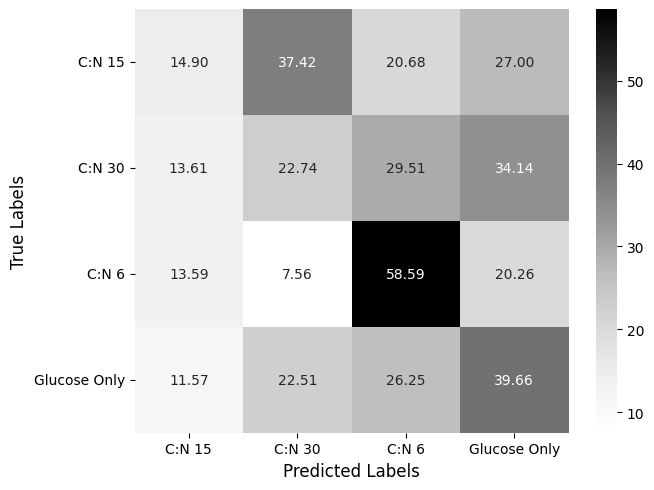

Overall Accuracy: 0.3397
Overall Precision: 0.3228
Overall Recall: 0.3397


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import os

def plot_confusion_matrix(npz_file_path, custom_labels, save_name=None):
    # Load the NPZ file
    data = np.load(npz_file_path, allow_pickle=True)

    # Extract true labels and predicted labels
    true_labels = data['true_labels']  # Adjust the key as necessary
    pred_labels = data['pred_labels']   # Adjust the key as necessary

    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)

    # Normalize the confusion matrix to percentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Plot confusion matrix using seaborn heatmap with a greyscale color map
    plt.figure(figsize=(7, 5.5))
    sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Greys", 
                xticklabels=custom_labels, yticklabels=custom_labels)

    # Add labels and title
    plt.ylabel('True Labels', fontsize=12)
    plt.xlabel('Predicted Labels', fontsize=12)
    
    # Adjust label rotations: Predicted (x-axis) horizontal, True (y-axis) vertical
    plt.xticks(rotation=0)  # Keep the predicted labels horizontal
    plt.yticks(rotation=0)  # Keep the true labels vertical

    # Save the plot to file in the current working directory if save_name is provided
    if save_name:
        save_path = os.path.join(os.getcwd(), save_name)
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Confusion matrix saved to: {save_path}")

    # Show the plot
    plt.show()

    # Calculate overall metrics
    accuracy = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels, average='weighted')
    recall = recall_score(true_labels, pred_labels, average='weighted')

    # Display overall metrics
    print(f'Overall Accuracy: {accuracy:.4f}')
    print(f'Overall Precision: {precision:.4f}')
    print(f'Overall Recall: {recall:.4f}')

# Path to the NPZ file
npz_file_path = "/pscratch/sd/n/niranjan/output/prediction_10_18_01_00.npz"

# Custom labels to replace 0, 1, 2, etc.
custom_labels = [ 'C:N 15', 'C:N 30', 'C:N 6','Glucose Only']  # Replace with your actual labels

# Custom name for the saved confusion matrix image
save_name = "conf_ambr01.png"

# Call the function to plot the confusion matrix, save it, and calculate overall metrics
plot_confusion_matrix(npz_file_path, custom_labels, save_name)


In [112]:
import numpy as np

def append_feed_to_npz(file_path, output_path):
    # Load the existing NPZ file
    npz_file = np.load(file_path, allow_pickle=True)

    # Define the 'feed' data (C:N 6, C:N 15, C:N 30)
    feed_values = ['C:N 6', 'C:N 15', 'C:N 30']
    
    # Get the number of images (assuming the number of images is represented by the shape of 'images' array)
    num_images = npz_file['images'].shape[0]
    print("Number of images:", num_images)  # Print number of images for debugging

    # Initialize the feed array
    feed_repeated = []

    # Full cycles for 5 sets of 9500 images
    for i in range(5):
        # Append 'C:N 6', 'C:N 15', 'C:N 30' for 9500 images each
        feed_repeated.extend(['C:N 6'] * min(9500, num_images))
        num_images -= 9500
        if num_images <= 0:
            break

        feed_repeated.extend(['C:N 15'] * min(9500, num_images))
        num_images -= 9500
        if num_images <= 0:
            break

        feed_repeated.extend(['C:N 30'] * min(9500, num_images))
        num_images -= 9500
        if num_images <= 0:
            break

    # For the 6th cycle, if any images remain
    if num_images > 0:
        # Assign remaining images to 'C:N 6', 'C:N 15', then 'C:N 30' for remaining images
        feed_repeated.extend(['C:N 6'] * min(9500, num_images))
        num_images -= 9500
        
        if num_images > 0:
            feed_repeated.extend(['C:N 15'] * min(9500, num_images))
            num_images -= 9500
        
        if num_images > 0:
            feed_repeated.extend(['C:N 30'] * min(num_images, 9500))

    # Convert the feed list to a numpy array
    feed_repeated = np.array(feed_repeated)

    # Append the new 'feed' key
    new_npz_data = {key: npz_file[key] for key in npz_file.keys()}
    new_npz_data['feed'] = feed_repeated

    # Save the updated NPZ file to the new output path
    np.savez(output_path, **new_npz_data)

    # Return the feed data as a 1D list
    return feed_repeated.tolist(), len(feed_repeated)

# Provide the file paths
input_file_path = "/pscratch/sd/n/niranjan/output/ambr03/prediction_10_15_03_00.npz"
output_file_path = "/pscratch/sd/n/niranjan/output/ambr03/prediction_by_feed_10_15_03_00.npz"

# Call the function and get the feed list and its size
feed_list, feed_size = append_feed_to_npz(input_file_path, output_file_path)

# Print the results
print("Size of 'feed':", feed_size)  # Display the size of 'feed'


Number of images: 171000
Size of 'feed': 171000


In [ ]:
# testing for metadata carry forward stuff

In [8]:
import numpy as np

npz = np.load('/pscratch/sd/n/niranjan/tar_ball/segmented_square_96/S14/S14_HT12/all_processed.npz')
list(npz.keys())
# /pscratch/sd/n/niranjan/output/prediction_test_10_23_01_00.npz
#/pscratch/sd/n/niranjan/tar_ball/segmented_square_96/S14/S14_HT12/all_processed.npz

['masks', 'images', 'paths', 'ht', 'time', 'feed', 'sample']

In [2]:
for key in npz.keys():
    print(f"{key}: {npz[key][:5]}")

predictions: [15.09678  13.931594 13.507418 17.720161 18.137056]
true_labels: [28. 28. 28. 28. 28.]
pred_labels: [15.09678  13.931594 13.507418 17.720161 18.137056]
masks: [[[164 164 159 ... 167 169 165]
  [151 171 159 ... 157 163 159]
  [169 153 163 ... 163 154 165]
  ...
  [156 164 163 ... 153 171 152]
  [159 153 154 ... 153 162 151]
  [162 156 163 ... 165 159 153]]

 [[128 127 123 ... 128 133 128]
  [137 132 129 ... 128 137 125]
  [136 132 129 ... 129 136 132]
  ...
  [127 129 124 ... 127 126 131]
  [124 127 127 ... 132 128 129]
  [125 133 127 ... 128 129 127]]

 [[139 137 136 ... 128 128 137]
  [147 131 135 ... 131 133 135]
  [139 136 132 ... 134 125 127]
  ...
  [136 131 135 ... 130 134 127]
  [130 134 141 ... 135 135 134]
  [137 134 139 ... 124 133 131]]

 [[159 153 157 ... 158 164 155]
  [148 160 154 ... 156 144 163]
  [158 155 153 ... 154 164 149]
  ...
  [159 153 156 ... 151 148 156]
  [159 157 147 ... 154 157 152]
  [154 157 155 ... 150 149 149]]

 [[156 153 151 ... 161 158 1

In [1]:
#below is done only for testing purpose of our code before dinalising it 

In [8]:
# 1)

True Label 28 - Group Size: 38000 - Predicted Values Range: 12.510758399963379 to 152.08609008789062
True Label 100 - Group Size: 38000 - Predicted Values Range: 23.56153106689453 to 166.88233947753906
True Label 148 - Group Size: 38000 - Predicted Values Range: 23.31220245361328 to 163.50302124023438


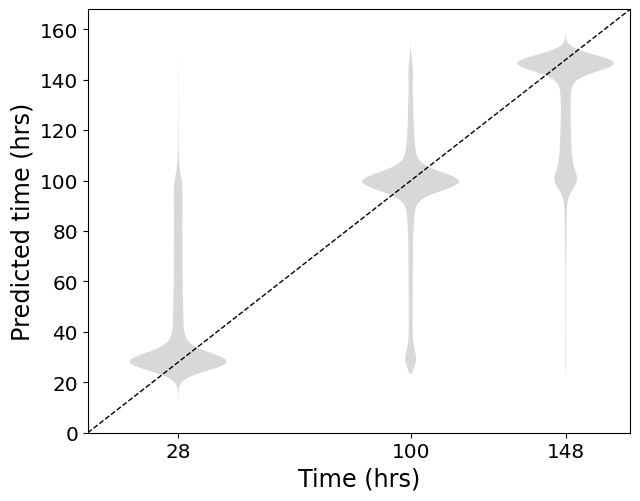

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_true_vs_pred_and_violin(file_path, unique_labels, ax=None, expand_lims=False):
    # Load the npz file
    npz_file = np.load(file_path)
    if ax is None:
        ax = plt.gca()
    
    # Extract necessary data
    true_labels = npz_file['true_labels']
    if 'pred_values' in npz_file:
        pred_values = npz_file['pred_values']
    else:
        pred_values = npz_file['pred_labels']
    
    # Unique true labels (28, 100, 148)
    
    # Group pred_values based on true_labels
    grouped_pred_values = [pred_values[true_labels == label] for label in unique_labels]

    # Check if the grouping is correct and print basic statistics
    for label, group in zip(unique_labels, grouped_pred_values):
        print(f"True Label {label} - Group Size: {len(group)} - Predicted Values Range: {np.min(group)} to {np.max(group)}")
        if len(group) == 0:
            print(f"Warning: No predicted values found for True Label {label}")
    
    # Plot the violins
    violin_parts = ax.violinplot(
        grouped_pred_values, 
        positions=unique_labels,  # Custom x-axis positions
        widths=10 if expand_lims else 30,              # Increased width of violins
        showmeans=False,           # Do not show the mean
        showmedians=False,         # Do not show the median
        showextrema=False,         # Remove the vertical extrema (min/max) lines
        bw_method='silverman',    # Bandwidth method for smoothing
        points=200,               # Number of points for KDE estimation
        side='both'               # Plot both sides of the violin
    )
    
    # Customize the appearance
    ax.set_xticks(unique_labels, [str(_) for _ in unique_labels])  # Label x-axis with unique true labels
    ax.set_xlabel('Time (hrs)', fontsize='xx-large')
    ax.set_ylabel('Predicted time (hrs)', fontsize='xx-large')
    ax.tick_params('both', labelsize='x-large')

    # Customize colors and styles for each component of the violins
    for vp in violin_parts['bodies']:
        vp.set_facecolor('grey')   # Set face color to grey
        vp.set_edgecolor('none')  # Set edge color to none
        vp.set_linewidth(1.5)      # Thicker lines for clarity

    if expand_lims:

        # Get maximum limit for both axes
        x_min = min(unique_labels) - 20
        y_min = min(unique_labels) - 20
        x_max = max(unique_labels) + 20
        y_max = max(unique_labels) + 20
    else:
        
        # Get maximum limit for both axes
        x_min = 0
        y_min = 0
        x_max = max(unique_labels) + 20
        y_max = max(unique_labels) + 20
    
    # Add a grey line for y = x (diagonal line) from origin to the maximum limit
    ax.plot([x_min, x_max], [x_min, y_max], 
             color='k', linestyle='--', linewidth=1, label="y = x")
    # Set the axis limits to include the origin and add some padding
    ax.set_xlim(x_min, x_max)  
    ax.set_ylim(y_min, y_max)  

    
# Create the violin plot without jittering
plt.figure(figsize=(7, 5.5))
# Provide the file path
file_path = "/pscratch/sd/n/niranjan/output/prediction_test_time_10_24_01_00.npz"
plot_true_vs_pred_and_violin(file_path, [28, 100, 148])

# Save the figure to a file


In [5]:
# 2)

Confusion matrix saved to: /pscratch/sd/n/niranjan/lmcontrol/notebooks/conf_ambr01.png


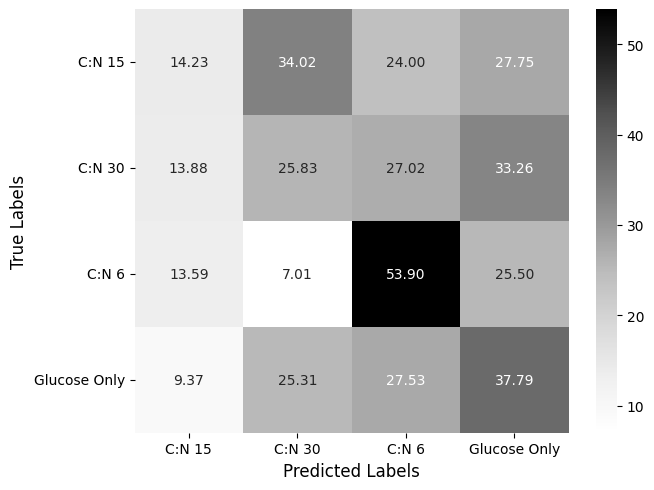

Overall Accuracy: 0.3294
Overall Precision: 0.3175
Overall Recall: 0.3294


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import os

def plot_confusion_matrix(npz_file_path, custom_labels, save_name=None):
    # Load the NPZ file
    data = np.load(npz_file_path, allow_pickle=True)

    # Extract true labels and predicted labels
    true_labels = data['true_labels']  # Adjust the key as necessary
    pred_labels = data['pred_labels']   # Adjust the key as necessary

    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)

    # Normalize the confusion matrix to percentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Plot confusion matrix using seaborn heatmap with a greyscale color map
    plt.figure(figsize=(7, 5.5))
    sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Greys", 
                xticklabels=custom_labels, yticklabels=custom_labels)

    # Add labels and title
    plt.ylabel('True Labels', fontsize=12)
    plt.xlabel('Predicted Labels', fontsize=12)
    
    # Adjust label rotations: Predicted (x-axis) horizontal, True (y-axis) vertical
    plt.xticks(rotation=0)  # Keep the predicted labels horizontal
    plt.yticks(rotation=0)  # Keep the true labels vertical

    # Save the plot to file in the current working directory if save_name is provided
    if save_name:
        save_path = os.path.join(os.getcwd(), save_name)
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Confusion matrix saved to: {save_path}")

    # Show the plot
    plt.show()

    # Calculate overall metrics
    accuracy = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels, average='weighted')
    recall = recall_score(true_labels, pred_labels, average='weighted')

    # Display overall metrics
    print(f'Overall Accuracy: {accuracy:.4f}')
    print(f'Overall Precision: {precision:.4f}')
    print(f'Overall Recall: {recall:.4f}')

# Path to the NPZ file
npz_file_path = "/pscratch/sd/n/niranjan/output/prediction_test_feed_10_24_01_00.npz"

# Custom labels to replace 0, 1, 2, etc.
custom_labels = [ 'C:N 15', 'C:N 30', 'C:N 6','Glucose Only']  # Replace with your actual labels

# Custom name for the saved confusion matrix image

# Call the function to plot the confusion matrix, save it, and calculate overall metrics
plot_confusion_matrix(npz_file_path, custom_labels, save_name)
